# Test Step Motor

In [ ]:
! sudo apt-get install python3-rpi.gpio
! pip install RPi.GPIO

[sudo] password for jh20akim: 

In [2]:
import RPi.GPIO as GPIO
import threading                                                                
from collections import deque

# for logging
import logging
logging.basicConfig(
    filename="StepMotor28BYJ_Test.log",
    format='%(asctime)s %(levelname)s:%(message)s',
    level=logging.DEBUG,
    datefmt='%m/%d/%Y %I:%M:%S %p',
)
###

class StepMotor28BYJ:
    def __init__(self, aint=3, bint=5, aint2=7, bint2=8):        
        self.aint = aint    
        self.bint = bint    
        self.aint2 = aint2    
        self.bint2 = bint2
        self.sig= deque([1,0,0,0])
        self.lock = threading.RLock()
        logging.debug('constructed')
        
    def init(self):
        logging.debug('init called')
        GPIO.setmode(GPIO.BOARD)
        GPIO.setup(self.aint,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.bint,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.aint2,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.bint2,GPIO.OUT,initial=GPIO.LOW)
        logging.debug('init succeed')
        
    def rotate(self, direction=True):
        logging.debug('rotate called')
        with self.lock:
            sig = self.sig
            GPIO.output(self.aint,sig[0])
            GPIO.output(self.bint,sig[1])
            GPIO.output(self.aint2,sig[2])
            GPIO.output(self.bint2,sig[3])
            sig.rotate(1 if direction else -1)
            logging.debug('rotate succeed')

            
    def deinit(self):
        GPIO.cleanup()
        logging.debug('deInit succeed')
        
   

In [4]:
import time

# Set count as 1000
targetCnt = 1000 

try:
    motor = StepMotor28BYJ()
    motor.init()
        
    for cnt in range(0, targetCnt):
        if cnt % 100 == 0 :
            print ("current cnt: ", cnt)
        motor.rotate(True)
        time.sleep(0.002)
except KeyboardInterrupt:
    pass
finally:
    motor.deinit()

current cnt:  0
current cnt:  100
current cnt:  200
current cnt:  300
current cnt:  400
current cnt:  500
current cnt:  600
current cnt:  700
current cnt:  800
current cnt:  900


# Test Servo Motor

In [3]:
import RPi.GPIO as GPIO
import time

GPIO.setmode(GPIO.BOARD)

# set up GPIO pin for servo control
servo_pin = 12
GPIO.setup(servo_pin, GPIO.OUT)

# set up PWM signal for servo control
pwm = GPIO.PWM(servo_pin, 50)

# set initial position of servo motor
pwm.start(2.5)
# rotate the motor to the 90 degree position
pwm.ChangeDutyCycle(7.5)
time.sleep(1)

# rotate the motor back to the 0 degree position
pwm.ChangeDutyCycle(2.5)
time.sleep(1)

# clean up GPIO pins
pwm.stop()
GPIO.cleanup()

In [4]:
import RPi.GPIO as GPIO
import time

# GPIO Servo모터 제어

servo_pin = 12
GPIO.setmode(GPIO.BOARD)
GPIO.setup(servo_pin, GPIO.OUT)
pwm = GPIO.PWM(servo_pin, 50) # 50Hz( 서보모터 PWM 동작을 위한 주파수 )
pwm.start(3.0) # 서보모터의 0도 위치( 0.6ms ) 이동: 값 3.0은 pwm 주기인 20ms 의 3% 를 의미

for cnt in range(0,3):
    pwm.ChangeDutyCycle(3.0) # 0도
    time.sleep(1.0)
    pwm.ChangeDutyCycle(7.5) # 90도
    time.sleep(1.0)
    pwm.ChangeDutyCycle(12.5) # 180도
    time.sleep(1.0)
pwm.stop()

In [5]:
import RPi.GPIO as GPIO
import threading

class ServoMotorSG90:
    def __init__(self, servo_pin=12):        
        self.servo_pin = servo_pin    
        GPIO.setmode(GPIO.BOARD)
        GPIO.setup(servo_pin, GPIO.OUT)
        self.lock = threading.RLock()
        self.pwm = GPIO.PWM(self.servo_pin, 50) # 50Hz( 서보모터 PWM 동작을 위한 주파수 )
        self.pwm.start(3.0) # 서보모터의 0도 위치( 0.6ms ) 이동: 값 3.0은 pwm 주기인 20ms 의 3% 를 의미
       
        
    def rotate(self, degree):
        with self.lock:
            sig = max(0, min(180, degree))
            duty = ( 12.5 * ( sig / 180 ))
            self.pwm.ChangeDutyCycle (duty) 
            
            
    def deinit(self):
        GPIO.cleanup()
        

In [6]:
import time

servo = ServoMotorSG90()
try:    
    for degree in [0, 90, 120, 180, 120, 90, 0]:
        print ("Rotate now ", degree)
        servo.rotate(degree)        
        time.sleep(1)
except KeyboardInterrupt:
    pass
finally:
    servo.deinit()

Rotate now  0
Rotate now  90
Rotate now  120
Rotate now  180
Rotate now  120
Rotate now  90
Rotate now  0


# Capture Camera image

In [ ]:
! sudo apt install libopencv-dev python3-opencv python3-scipy
# ! pip install opencv-python

In [1]:
import cv2

for index in range(10):
    cap = cv2.VideoCapture(index)
    if cap.read()[0]:
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        print(f"Camera index {index} is available")
        print(f"Frame rate: {fps}")
        print(f"Width: {width}, Height: {height}")
    else:
        print(f"Camera index {index} is not available")
    cap.release()

Camera index 0 is available
Frame rate: 25.0
Width: 640.0, Height: 480.0
Camera index 1 is not available
Camera index 2 is not available
Camera index 3 is not available
Camera index 4 is not available
Camera index 5 is not available
Camera index 6 is not available
Camera index 7 is not available
Camera index 8 is not available
Camera index 9 is not available


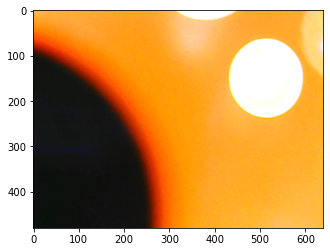

In [2]:
import cv2
import matplotlib.pyplot as plt

# Open the first webcam device
capture = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not capture.isOpened():
    print("Cannot open camera")
    exit()

# Read a frame from the webcam
ret, frame = capture.read()

# Check if the frame is empty
if not ret:
    print("Failed to read")
    exit()

# Display the frame
# cv2.imshow("Webcam", frame)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

# Release the webcam and destroy all windows
capture.release()
cv2.destroyAllWindows()

# Test inference

[Example](https://github.com/ultralytics/ultralytics/blob/main/examples/YOLOv8-OpenCV-ONNX-Python/main.py)

- pytorch : https://github.com/pytorch/pytorch
- Cross-compilation of PyTorch v1.9.0 armv7l for RaspberryPi OS Buster : https://zenn.dev/pinto0309/articles/b796e2d6396c1e
- PyTorch on Raspberry Pi : https://sites.google.com/view/steam-for-vision/raspberry-pi/PytorchRP4?pli=1


started
read model
input image shape h: 416 w: 416
outputs : [[[3.9274008e+00 1.2536474e+01 1.9045387e+01 ... 5.6009351e+02
   5.6463672e+02 6.0749219e+02]
  [3.1601171e+00 3.6630840e+00 3.7839608e+00 ... 6.2036993e+02
   6.2107678e+02 6.2399451e+02]
  [9.1269550e+00 2.0227238e+01 2.7224174e+01 ... 1.6098123e+02
   1.5175787e+02 7.2765198e+01]
  [1.1385805e+01 6.4534874e+00 6.8235502e+00 ... 4.0050049e+01
   3.8742615e+01 4.9318848e+01]
  [1.9332852e-05 2.9264002e-05 2.0221953e-05 ... 2.2752967e-04
   1.9298746e-04 1.4677629e-04]]]


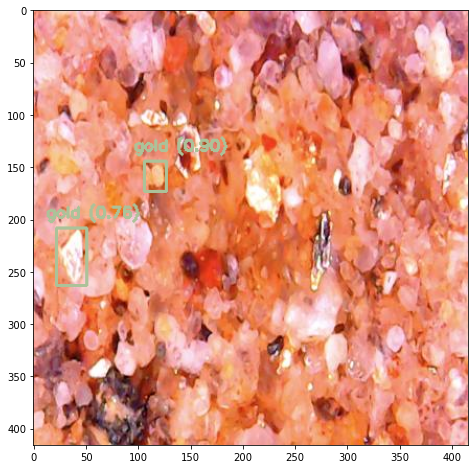

In [ ]:
print("started")
import cv2
import cv2.dnn
import numpy as np
import matplotlib.pyplot as plt

confidence = 0.5

CLASSES = ["gold"]
colors = np.random.uniform(0, 255, size=(len(CLASSES), 3))

def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = f'{CLASSES[class_id]} ({confidence:.2f})'
    color = colors[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

print("read model")
model: cv2.dnn.Net = cv2.dnn.readNetFromONNX("/home/pi/Projects/protowork/solution/Control/python/visions/models/best.onnx")
original_image: np.ndarray = cv2.imread("/home/pi/Projects/protowork/solution/Control/test.jpg")
[height, width, _] = original_image.shape
print("input image shape", "h:", height, "w:", width) 

length = max((height, width))
image = np.zeros((length, length, 3), np.uint8)
image[0:height, 0:width] = original_image
scale = length / 640


blob = cv2.dnn.blobFromImage(image, scalefactor=1 / 255, size=(640, 640), swapRB=True)
model.setInput(blob)
outputs = model.forward()

print("outputs :", outputs) 

outputs = np.array([cv2.transpose(outputs[0])])
rows = outputs.shape[1]

boxes = []
scores = []
class_ids = []

for i in range(rows):
    classes_scores = outputs[0][i][4:]
    (minScore, maxScore, minClassLoc, (x, maxClassIndex)) = cv2.minMaxLoc(classes_scores)
    if maxScore >= confidence:
        box = [
            outputs[0][i][0] - (0.5 * outputs[0][i][2]), outputs[0][i][1] - (0.5 * outputs[0][i][3]),
            outputs[0][i][2], outputs[0][i][3]]
        boxes.append(box)
        scores.append(maxScore)
        class_ids.append(maxClassIndex)

result_boxes = cv2.dnn.NMSBoxes(boxes, scores, 0.25, 0.45, 0.5)

detections = []
# original_image = cv2.resize(original_image, (640, 480))

for i in range(len(result_boxes)):
    index = result_boxes[i]
    box = boxes[index]
    detection = {
        'class_id': class_ids[index],
        'class_name': CLASSES[class_ids[index]],
        'confidence': scores[index],
        'box': box,
        'scale': scale}
    detections.append(detection)
    draw_bounding_box(original_image, class_ids[index], scores[index], round(box[0] * scale), round(box[1] * scale),
                      round((box[0] + box[2]) * scale), round((box[1] + box[3]) * scale))

# cv2.imshow('image', original_image)
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
! pip install opencv-python==4.7.0.72

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [ ]:
! pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 MB 753.9 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

In [2]:
import cv2
print(cv2.__version__)

4.7.0-dev
